This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will analyze clustering methods over the Pima Indiand Diabetes dataset.

# Table of Contents

0. [Preliminaries](#preliminaries)
1. [K-means](#k_means) 
2. [Hierchical clustering](#hierarchical)
3. [Assignment questions](#questions)

---
<a id='preliminaries'></a>
# 0 . Preliminaries

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# your code here
# ... add as many libraries as you want

## Load dataset

In this lab exercise you are using the Pima Indian Diabetes data. Your hypothesis is that **there might be groups of patients with similar behavior** and you want to get some insights about them.

In [2]:
from src.ddbb import load_pima_indian

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

---
<a id='k_means'></a>
# 1. K-means

In [3]:
from sklearn.preprocessing import StandardScaler

X1 = X[['bmi','glucose']].values
X1 = StandardScaler().fit_transform(X1)

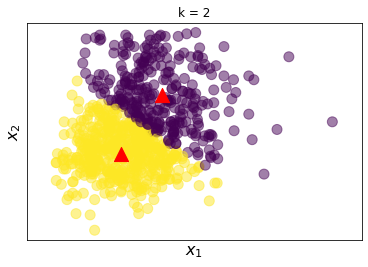

In [4]:
from src.utils import plot_scatter, plot_silhouette
from sklearn.cluster import KMeans

# build the clustering model
k = 2
kmeans = KMeans(n_clusters = k).fit(X1)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
plt.show()

<div class = "alert alert-info">
<b>Note:</b> You can use either <b>cluster_labels</b> or <b>outcome</b> in the above representation
</div>

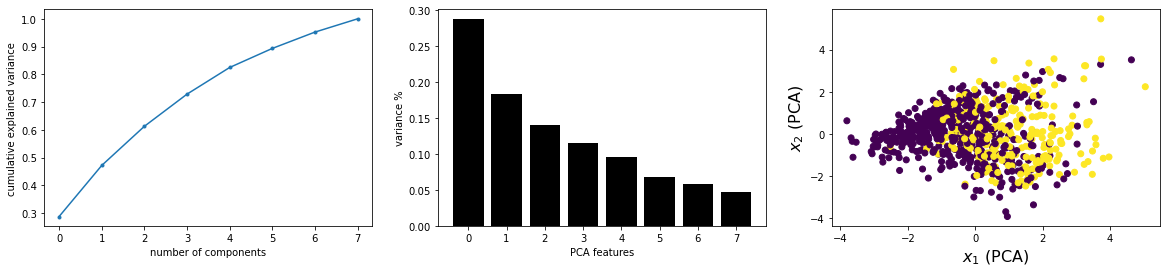

In [5]:
from sklearn.decomposition import PCA

# scaling
X_scaled = StandardScaler().fit_transform(X)

# Number of components
pca = PCA().fit(X_scaled)

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.subplot(1,3,2)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(range(pca.n_components_))


# Data visualization (just 2 components)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.subplot(1,3,3)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
plt.xlabel('$x_1$ (PCA)',fontsize=16)
plt.ylabel('$x_2$ (PCA)',fontsize=16)

plt.show()

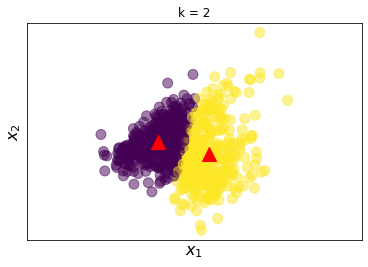

In [6]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)

kmeans = KMeans(n_clusters = k).fit(X_pca)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(X_pca,'k = ' + str(k), cluster_labels, centroids)
plt.show()

---
<a id='hierarchical'></a>
# 2. Hierarchical clustering

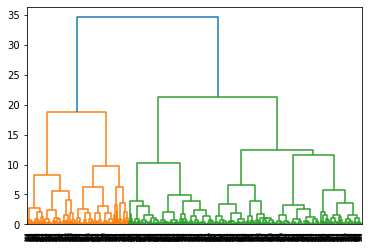

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

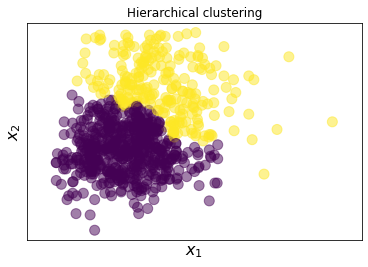

In [8]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2).fit(X1)
plot_scatter(X1,'Hierarchical clustering', agg.labels_) 

---
<a id='questions'></a>
# 3. Assignment questions (lab 6)






<div class="alert alert-block alert-danger">
<b>Question 6.1</b>: Apply k-means algorithms considering only <b>bmi</b> and <b>glucose</b> features from the original dataset:

- What are the selected number of clusters? Justify your answer

</div>

First let's start loading data:

In [43]:
from src.ddbb import load_pima_indian

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

from sklearn.preprocessing import StandardScaler

X1 = X[['bmi','glucose']].values
X1 = StandardScaler().fit_transform(X1)

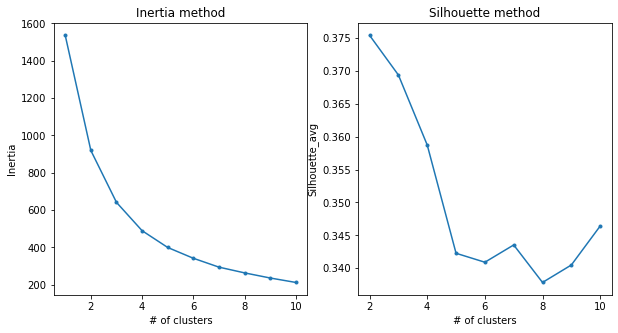

In [44]:
from sklearn.metrics import silhouette_score

K = range(1,11)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_list  = []
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_list.append(silhouette_avg)
    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
plt.plot(K,inertia,'.-')
plt.title("Inertia method")
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(range_n_clusters,silhouette_list,'.-')
plt.title("Silhouette method")
plt.xlabel('# of clusters')
plt.ylabel('Silhouette_avg')
plt.show()

We could see that the best option is **n_clusters = 8** according to **Silhouette method**. We discarded **Inertia method** since it does not offer a clear visualization of the optimal cluster number. You could see below the clustering:

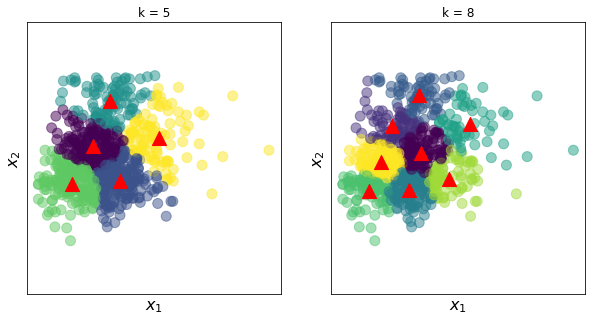

In [45]:
from src.utils import plot_scatter, plot_silhouette
from sklearn.cluster import KMeans

# build the clustering model
k = 5
k2 = 8
kmeans = KMeans(n_clusters = k).fit(X1)
kmeans2= KMeans(n_clusters= k2).fit(X1)

# Centroids 
centroids  = kmeans.cluster_centers_
centroids2 = kmeans2.cluster_centers_

# Labels
cluster_labels  = kmeans.labels_
cluster_labels2 = kmeans2.labels_


# do the plotting
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_scatter(X1,'k = ' + str(k), cluster_labels, centroids)
plt.subplot(1,2,2)
plot_scatter(X1,'k = ' + str(k2), cluster_labels2, centroids2)
plt.show()

<div class="alert alert-block alert-danger">
<b>Question 6.2</b>: Apply k-means algorithms considering ALL features

- What are the selected number of clusters? Justify your answer
- Can you provide with any interpretation about cluster results? What salient feature/behavior characterize each cluster
</div>

In [46]:
#Load data for all features
X1 = X.values
X1 = StandardScaler().fit_transform(X1)

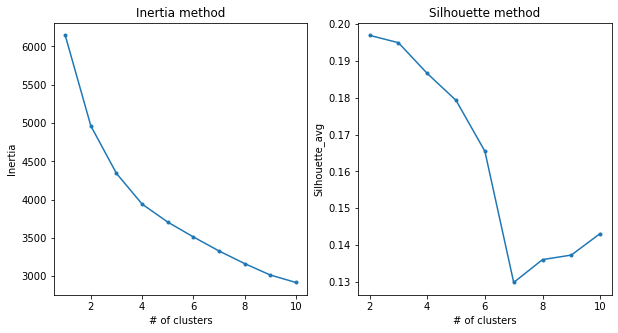

In [47]:
from sklearn.metrics import silhouette_score

K = range(1,11)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_list  = []
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X1)
    inertia.append(kmeans.inertia_)

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_list.append(silhouette_avg)
    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
plt.plot(K,inertia,'.-')
plt.title("Inertia method")
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(range_n_clusters,silhouette_list,'.-')
plt.title("Silhouette method")
plt.xlabel('# of clusters')
plt.ylabel('Silhouette_avg')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=7).fit(X1)
cluster_labels = kmeans.fit_predict(X1)

df=X.copy()
df["cluster_labels"]=cluster_labels

In [49]:
df[df.cluster_labels==2]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_labels
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,2
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,2
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,2
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,2
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,2
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,2
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,2
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,2
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,2
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46,2


In [50]:
X.groupby(cluster_labels).agg({'mean'}).round(2)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
,mean,mean,mean,mean,mean,mean,mean,mean
0,6.15,142.22,79.39,27.27,161.21,29.17,0.53,56.75
1,2.08,101.59,64.16,21.26,118.67,26.20,0.45,24.95
2,3.59,164.09,71.19,33.56,462.62,35.57,0.59,33.50
3,1.60,141.97,82.41,40.60,171.29,43.38,0.84,30.88
4,1.75,103.70,67.92,33.84,126.48,36.43,0.40,25.92
5,8.79,115.76,76.07,32.11,149.69,34.60,0.44,40.88
6,3.27,143.59,77.00,28.01,160.70,31.86,0.38,32.02


<div class="alert alert-block alert-danger">
<b>Question 6.3</b>: Apply k-means algorithms considering Principal Component Analysis extracted features:

- What are the number of components you are using? Justify your answer
- What are the selected number of clusters? 
- Can you provide with any interpretation about cluster results? What salient feature/behavior characterize each cluster
</div>

In [51]:
X1 = X.values
X1 = StandardScaler().fit_transform(X1)

We will use the option that allows us to set the variance of the input lower, risking losing some information, but obtaining more quality results (quality over quantity). Therefore, we will select the amount of components that, together, are able to explain the 90% of the variance.

In [52]:
#90% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
pca.fit(X1)
reduced = pca.transform(X1)

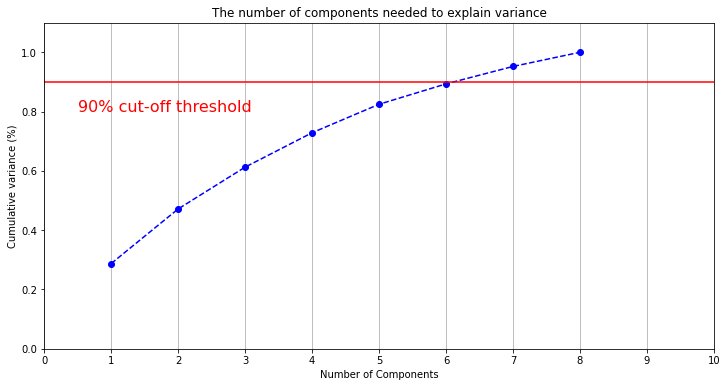

In [53]:
pca = PCA().fit(X1)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.8, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

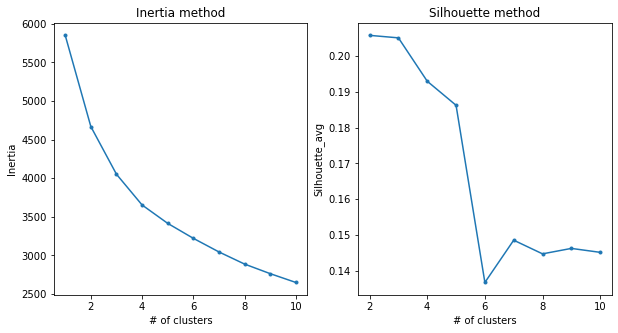

In [54]:
K = range(1,11)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_list  = []
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(reduced)
    inertia.append(kmeans.inertia_)

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(reduced)

    silhouette_avg = silhouette_score(reduced, cluster_labels)
    silhouette_list.append(silhouette_avg)
    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
plt.plot(K,inertia,'.-')
plt.title("Inertia method")
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(range_n_clusters,silhouette_list,'.-')
plt.title("Silhouette method")
plt.xlabel('# of clusters')
plt.ylabel('Silhouette_avg')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=6).fit(reduced)
cluster_labels = kmeans.fit_predict(reduced)

df=X.copy()
df["cluster_labels"]=cluster_labels

In [56]:
df[df.cluster_labels==2]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_labels
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,2
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,2
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,2
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,2
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,2
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,2
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,2
199,4,148.0,60.0,27.0,318.0,30.9,0.150,29,2
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,2
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,2


In [57]:
X.groupby(cluster_labels).agg({'mean'}).round(2)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
,mean,mean,mean,mean,mean,mean,mean,mean
0,1.93,117.89,74.03,38.72,141.43,40.54,0.44,27.40
1,2.81,130.59,77.49,27.06,150.67,31.19,0.35,32.15
2,3.72,164.59,70.25,33.19,456.38,35.55,0.51,33.88
3,2.13,99.53,63.42,22.96,118.99,27.30,0.41,25.11
4,8.25,130.28,77.67,30.37,156.27,32.59,0.41,47.65
5,3.90,139.51,74.73,31.21,168.32,35.37,1.21,35.37


<div class="alert alert-block alert-danger">
<b>Question 6.4</b>: Repeat from question 6.1 to 6.3 in the case of hierarchical clustering
</div>
<div class="alert alert-block alert-danger">
<b>Question 6.1 for Hierarchical clustering</b>
</div>

In [58]:
#First load the data
from src.ddbb import load_pima_indian

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

from sklearn.preprocessing import StandardScaler

X1 = X[['bmi','glucose']].values
X1 = StandardScaler().fit_transform(X1)

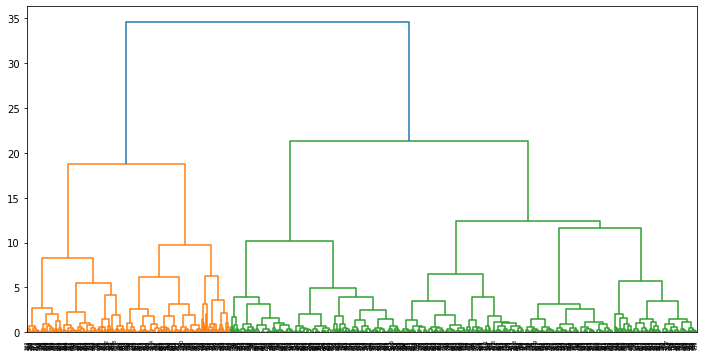

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

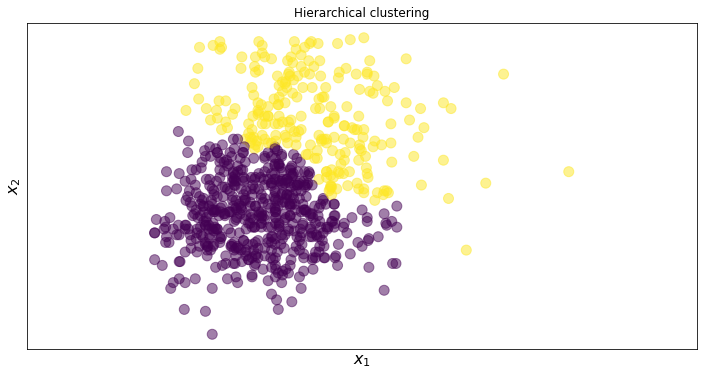

In [60]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2).fit(X1)
plot_scatter(X1,'Hierarchical clustering', agg.labels_) 
plt.show()

<div class="alert alert-block alert-danger">
<b>Question 6.2 for Hierarchical clustering</b>
</div>

In [61]:
#First load the data
from src.ddbb import load_pima_indian

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

from sklearn.preprocessing import StandardScaler

X1 = X.values
X1 = StandardScaler().fit_transform(X1)

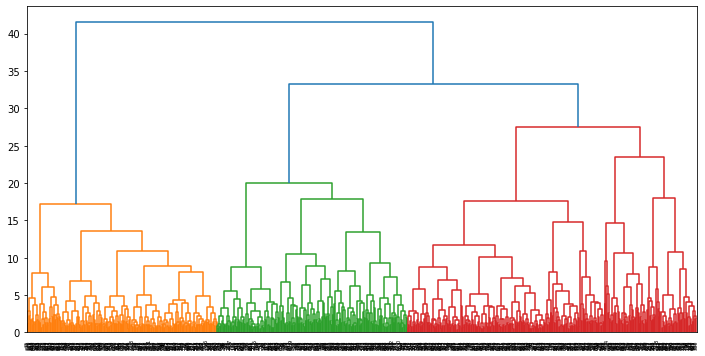

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X1, 'ward')
dendrogram(Z)
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering
 
agg = AgglomerativeClustering(n_clusters=3).fit(X1)
cluster_labels = agg.fit_predict(X1)
 
df=X.copy()
df["cluster_labels"]=cluster_labels
df[df.cluster_labels==2]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_labels
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,2
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,2
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,2
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,2
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,2
...,...,...,...,...,...,...,...,...,...
756,7,137.0,90.000000,41.00000,155.548223,32.000000,0.391,39,2
759,6,190.0,92.000000,29.15342,155.548223,35.500000,0.278,66,2
761,9,170.0,74.000000,31.00000,155.548223,44.000000,0.403,43,2
762,9,89.0,62.000000,29.15342,155.548223,22.500000,0.142,33,2


In [64]:
X.groupby(cluster_labels).agg({'mean'}).round(2)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
,mean,mean,mean,mean,mean,mean,mean,mean
0,2.52,128.46,74.69,32.93,181.48,35.88,0.52,30.60
1,2.30,104.44,64.70,21.91,114.54,27.37,0.47,25.47
2,7.40,128.61,76.62,30.65,157.06,32.34,0.40,45.04


<div class="alert alert-block alert-danger">
<b>Question 6.3 for Hierarchical clustering</b>
</div>

In [65]:
#First load the data
from src.ddbb import load_pima_indian

X, y = load_pima_indian('./data/pima_indian_diabetes.csv')
feat_names = X.columns

from sklearn.preprocessing import StandardScaler

#90% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9)
pca.fit(X1)
reduced = pca.transform(X1)

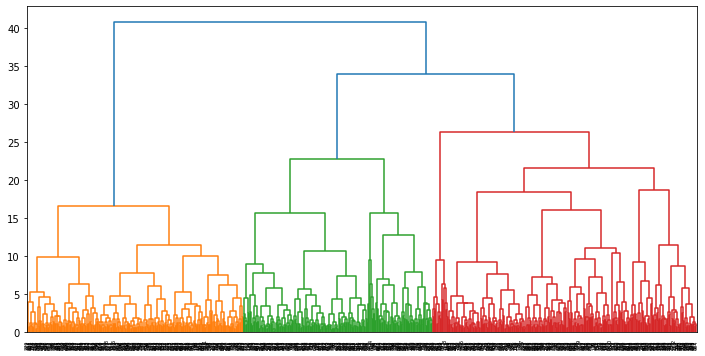

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(reduced, 'ward')
dendrogram(Z)
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering
 
agg = AgglomerativeClustering(n_clusters=3).fit(reduced)
cluster_labels = agg.fit_predict(reduced)
 
df=X.copy()
df["cluster_labels"]=cluster_labels
df[df.cluster_labels==2]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,cluster_labels
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,2
10,4,110.0,92.0,29.15342,155.548223,37.6,0.191,30,2
16,0,118.0,84.0,47.00000,230.000000,45.8,0.551,31,2
18,1,103.0,30.0,38.00000,83.000000,43.3,0.183,33,2
20,3,126.0,88.0,41.00000,235.000000,39.3,0.704,27,2
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,2
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,2
758,1,106.0,76.0,29.15342,155.548223,37.5,0.197,26,2
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,2


In [68]:
X.groupby(cluster_labels).agg({'mean'}).round(2)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
,mean,mean,mean,mean,mean,mean,mean,mean
0,6.61,133.50,74.98,29.70,186.27,32.00,0.46,42.41
1,2.05,105.86,65.43,23.50,120.66,28.15,0.44,25.74
2,2.03,123.29,76.78,34.85,152.53,38.02,0.52,29.02
